# TC 3006B Inteligencia artificial avanzada para la ciencia de datos I 
# CIFAR-10 Data Preparation (PyTorch)
## Feedback

## Deep Learning -- Data Cleaning 

### Objective: Load CIFAR-10, explore data, compute per-channel statistics (mean & std), normalize images, and verify normalization. 

### Instructions
- Focus on data preparation, analysis, data is not usually as nice as CIFAR10 is. Model training follows as explained in classes.
- Write comments and reflections in the indicated, verify you answer questions in Markdown cells.
- Keep your code clean, reproducible, and well‑commented.



## Environment & Reproducibility


In [55]:
%pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 6.3 MB/s  0:00:016.3 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 7.5 MB/s  0:00:007.5 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 5.9 MB/s  0:00:006.3 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 7.2 MB/s  0:00:027.2 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 6.0 MB/s  0:00:02a 0:00:01m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 7.4 MB/s  0:00:00m 7.4 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15/15 [seaborn]━ 14/15 [seaborn]atplotlib]

[notice] A new release of pip is available: 22.0.2 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [56]:
# Install libraries as needed, if using Colab, maybe all good

import os, json, random, math, time
from pathlib import Path
import numpy as np
import torch
from torch.utils.data import DataLoader
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

##########################################
SEED = 42 #for reproducibility 
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)
###########################################

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)


cpu



## Download & Load CIFAR-10 (Train/Test Splits)


To become familiar with the __PyTorch framework__, the __CIFAR-10__ dataset will be uploaded, its elements converted to __PyTorch Tensors__, and then split into train and test sets.

In [35]:
# Maybe obvious, adjust path according to your needs
DATA_DIR = Path("./cifar-10-batches-py") 
DATA_DIR.mkdir(parents=True, exist_ok=True)

# Base transform for statistics: convert to tensor only (no normalization/augmentations yet)
base_transform = transforms.ToTensor()

#Data set splt
train_set = datasets.CIFAR10(root=DATA_DIR, train=True, download=True, transform=base_transform)
test_set  = datasets.CIFAR10(root=DATA_DIR, train=False, download=True, transform=base_transform)

# Dimensions of train and test set 
f"Train: {len(train_set)}", f"Test: {len(test_set)}", f"Train shape: {train_set.data.shape}"


('Train: 50000', 'Test: 10000', 'Train shape: (50000, 32, 32, 3)')

Based on the split, the training and testing sets have the following dimensions:

- Training set: 50,000 images

- Testing set: 10,000 images

The shape of the training set indicates that each image is 32 pixels in height and 32 pixels in width, with three color channels: Red, Green, and Blue.

### Original Sample vs Tensor Transformation

After the dataset is uploaded, a transformation is applied to each element. This transformation, using the PyTorch framework, converts each image into a PyTorch tensor via `transforms.ToTensor()`.

To understand what this framework transformation does, it's important to compare the data before and after the transformation.

In [37]:
# original image and tensor obtention
original_image = train_set.data[0]
img_tensor, label = train_set[0]
# Showing original image data
print("ORIGINAL IMAGE DATA")
print(f"Shape: {original_image.shape}")
print(f"Data type: {original_image.dtype}")
print(f"Value range:{original_image.min().item()} - {original_image.max().item()}")
# Showing tensor data
print("\nTENSOR DATA")
print(f"Shape: {img_tensor.shape}")
print(f"Data type: {img_tensor.dtype}")
print(f"Value range:{img_tensor.min().item()} - {img_tensor.max().item()}")

ORIGINAL IMAGE DATA
Shape: (32, 32, 3)
Data type: uint8
Value range:0 - 255

TENSOR DATA
Shape: torch.Size([3, 32, 32])
Data type: torch.float32
Value range:0.0 - 1.0


Based on the previous data, the PyTorch transformation applies the following changes:

- Dimension Transpose: `(H, W, C)` becomes `(C, H, W)`
- Data Type Conversion: `uint8` becomes `float32`

Besides the more evident transformations, a third one needs to be explained: __value normalization__. Before the transformation, the value range for each color channel is from 0 to 255. However, once the image is converted into a __PyTorch Tensor__, the value for each color channel of every pixel is normalized to a range between 0.0 and 1.0.


### Explore de dataset


In [5]:
classes = train_set.classes
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

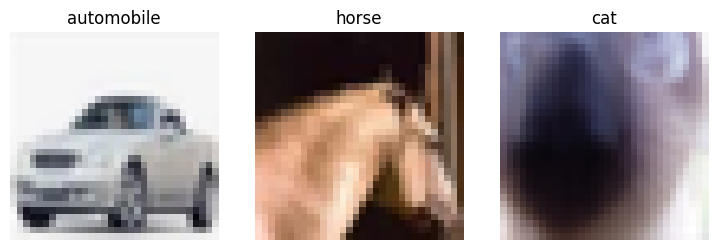

In [21]:
def show_images(dataset, n=5):
    fig, axes = plt.subplots(1, n, figsize=(n*2.5, 2.5))
    for ax in axes:
        idx = np.random.randint(0, len(dataset))
        img, label = dataset[idx]
        # img: tensor [C,H,W] in [0,1]
        ax.imshow(np.transpose(img.numpy(), (1, 2, 0)))  # HWC
        ax.set_title(classes[label])
        ax.axis("off")
    plt.tight_layout()
    plt.show()

show_images(train_set, n=3)


Now that there is a better understanding of the CIFAR-10 dataset, we can see that it's composed of 60,000 samples. Each sample is an image with a resolution of 32x32 pixels and three color channels: Red, Green, and Blue. The dataset contains images from ten different classes:

0. airplane
1. automobile
2. bird
3. cat
4. deer
5. dog
6. frog
7. horse
8. ship
9. truck

The normalization of color channels in each image of the __CIFAR-10__ dataset is a fundamental step in data transformation, allowing it to be used for training and testing a deep learning model. This process guarantees a uniform data distribution, which prevents precision issues in floating-point operations and enables optimization algorithms to converge more quickly.


> **Reflection (Markdown):** Describe CIFAR‑10 (resolution, channels, number of classes/samples). Include one sentence on why normalization is helpful for training.



## Compute Per‑Channel Mean & Standard Deviation



In [ ]:
BATCH_SIZE = 512
train_loader = DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=True)

channels = 3
mean     = torch.zeros(channels)
std      = torch.zeros(channels)

for i in range(len(train_set)): 
    tensor, _ = train_set[i]
    # Obtaining the mean of each color channel
    mean[0] += tensor[0].mean()
    mean[1] += tensor[1].mean()
    mean[2] += tensor[2].mean()
    # Obtaining the squared mean of each channel
    std[0]  += (tensor[0] ** 2).mean()
    std[1]  += (tensor[1] ** 2).mean()
    std[2]  += (tensor[2] ** 2).mean()

# Mean calculation
mean[0] /= len(train_set)
mean[1] /= len(train_set)
mean[2] /= len(train_set)
# Standard Deviation calculation
std[0] = ((std[0]/len(train_set)) - mean[0] ** 2) ** 0.5
std[1] = ((std[1]/len(train_set)) - mean[1] ** 2) ** 0.5
std[2] = ((std[2]/len(train_set)) - mean[2] ** 2) ** 0.5

f"Mean: {mean}", f"Standard Deviation: {std}"


('Mean: tensor([0.4914, 0.4822, 0.4465])',
 'Standard Deviation: tensor([0.2470, 0.2435, 0.2616])')


> Record your computed values here (e.g., `Mean ≈ [0.4914, 0.4822, 0.4465]`, `Std ≈ [0.2470, 0.2435, 0.2616]`). Your numbers should closely match these canonical references.



## Normalize Datasets Using Computed Stats


In [45]:
normalize = transforms.Normalize(mean=mean.tolist(), std=std.tolist())

train_transform = transforms.Compose([
    transforms.ToTensor(),
    normalize,
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    normalize,
])

train_set_norm = datasets.CIFAR10(root=DATA_DIR, train=True, download=False, transform=train_transform)
test_set_norm  = datasets.CIFAR10(root=DATA_DIR, train=False, download=False, transform=test_transform)

len(train_set_norm), len(test_set_norm)


(50000, 10000)


## Verify Normalization (Means ≈ 0, Stds ≈ 1)

Confirm the transformation worked as intended.


In [51]:

train_loader_norm = DataLoader(train_set_norm, batch_size=BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=True)

channels  = 3
mean_norm = torch.zeros(channels)
std_norm  = torch.zeros(channels)

for i in range(len(train_set_norm)): 
    norm_tensor, _ = train_set_norm[i]
    # Obtaining the mean of each color channel
    mean_norm[0] += norm_tensor[0].mean()
    mean_norm[1] += norm_tensor[1].mean()
    mean_norm[2] += norm_tensor[2].mean()
    # Obtaining the squared mean of each channel
    std_norm[0]  += (norm_tensor[0] ** 2).mean()
    std_norm[1]  += (norm_tensor[1] ** 2).mean()
    std_norm[2]  += (norm_tensor[2] ** 2).mean()

# Mean calulation
mean_norm[0] /= len(train_set_norm)
mean_norm[1] /= len(train_set_norm)
mean_norm[2] /= len(train_set_norm)
# Standard Deviation calculation
std_norm[0] = ((std_norm[0]/len(train_set_norm)) - mean_norm[0] ** 2) ** 0.5
std_norm[1] = ((std_norm[1]/len(train_set_norm)) - mean_norm[1] ** 2) ** 0.5
std_norm[2] = ((std_norm[2]/len(train_set_norm)) - mean_norm[2] ** 2) ** 0.5

f"Normalized Mean: {mean_norm}", f"Normalized Std. Deviation: {std_norm}"

('Normalized Mean: tensor([-4.5123e-06, -2.3405e-06, -6.1984e-08])',
 'Normalized Std. Deviation: tensor([1.0000, 1.0000, 1.0000])')


> Report the post‑normalization means and stds. They should be close to `[0,0,0]` and `[1,1,1]` (small deviations are normal due to rounding/batching).



## Light Data Augmentation
Add a few basic augmentations (random crop with padding, random horizontal flip). Use **train** only.


In [52]:

aug_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    #anything else you may want to add is welcomed
    transforms.RandomCrop(32, padding=4),
    transforms.ColorJitter(0.2, 0.2, 0.1),    
    transforms.ToTensor(),
    normalize,
])

train_set_aug = datasets.CIFAR10(root=DATA_DIR, train=True, download=False, transform=aug_transform)
len(train_set_aug)


50000


> Explain when/why augmentation helps. What risks do heavy augmentations pose for small images like CIFAR‑10 (32×32)?



## Class Distribution
Confirm class balance. CIFAR‑10 should be balanced across the 10 classes. Create a plot as a visual aid


airplane: 5000
automobile: 5000
bird: 5000
cat: 5000
deer: 5000
dog: 5000
frog: 5000
horse: 5000
ship: 5000
truck: 5000


/tmp/ipykernel_33049/2247002818.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classes, y=counts, palette="viridis")


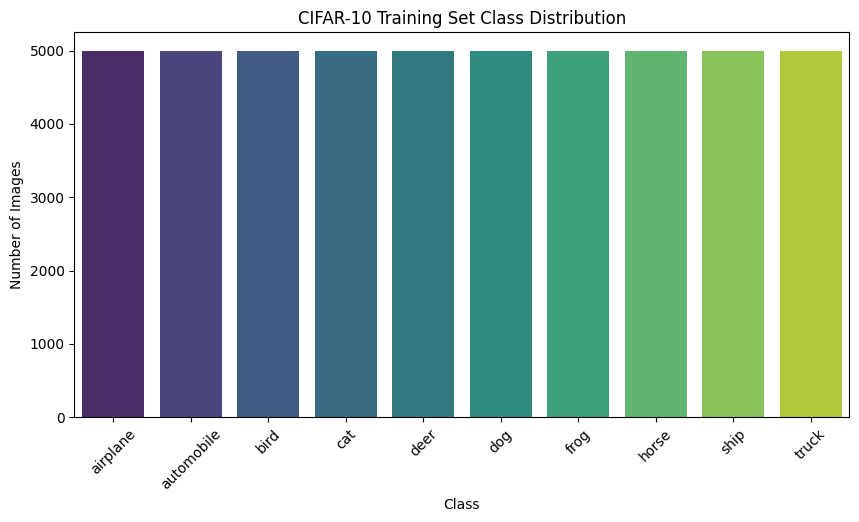

In [57]:
# Nombres de las clases en CIFAR-10
classes = train_set.classes  # o datasets.CIFAR10.classes

# Contar frecuencia de cada clase en train_set
train_labels = [label for _, label in train_set]
class_counts = Counter(train_labels)

# Ordenamos de acuerdo a los índices de clase
counts = [class_counts[i] for i in range(len(classes))]

# Mostrar conteo en consola
for i, c in enumerate(classes):
    print(f"{c}: {counts[i]}")

# Gráfico de barras
plt.figure(figsize=(10,5))
sns.barplot(x=classes, y=counts, palette="viridis")
plt.title("CIFAR-10 Training Set Class Distribution")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
plt.show()


airplane: 1000
automobile: 1000
bird: 1000
cat: 1000
deer: 1000
dog: 1000
frog: 1000
horse: 1000
ship: 1000
truck: 1000


/tmp/ipykernel_33049/2687129445.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classes, y=counts, palette="viridis")


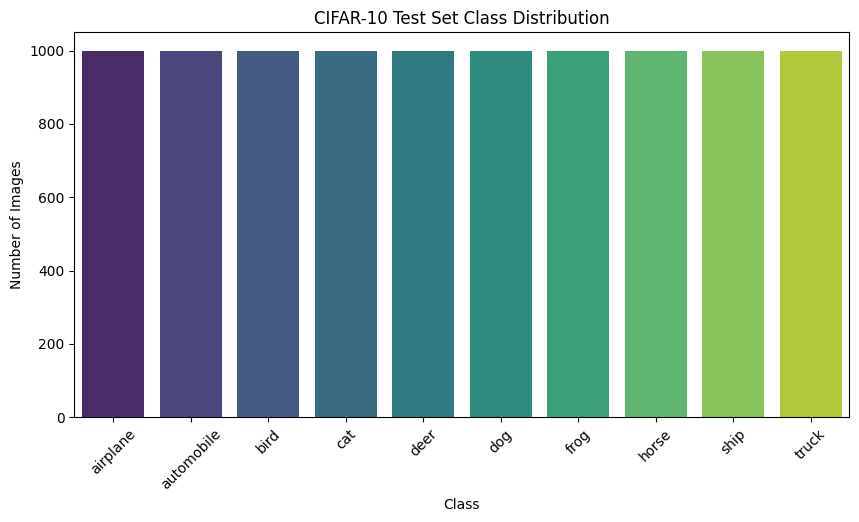

In [58]:
# Nombres de las clases en CIFAR-10
classes = test_set.classes  # o datasets.CIFAR10.classes

# Contar frecuencia de cada clase en train_set
test_labels = [label for _, label in test_set]
class_counts = Counter(test_labels)

# Ordenamos de acuerdo a los índices de clase
counts = [class_counts[i] for i in range(len(classes))]

# Mostrar conteo en consola
for i, c in enumerate(classes):
    print(f"{c}: {counts[i]}")

# Gráfico de barras
plt.figure(figsize=(10,5))
sns.barplot(x=classes, y=counts, palette="viridis")
plt.title("CIFAR-10 Test Set Class Distribution")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
plt.show()


## 9. Submission Checklist
- [ ] Printed dataset sizes and showed random sample images.
- [ ] Reported per‑channel mean & std from the training set.
- [ ] Applied normalization using computed stats.
- [ ] Verified post‑normalization mean/std are ~0/1.
- [ ] Basic augmentations and rationale.
